<a href="https://colab.research.google.com/github/VARSHAMG23/ML-Algorithms/blob/main/Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hierarchial_Clustering**

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#clustering related packages
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

**Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [13]:
df.describe()  #statistical description of the data which can also be used to identify the outliers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [14]:
df.describe(percentiles = [0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
80%,160.200000,1.000000,50.200000,78.200000,75.000000
90%,180.100000,1.000000,59.100000,93.400000,87.100000
95%,190.050000,1.000000,66.050000,103.000000,92.000000


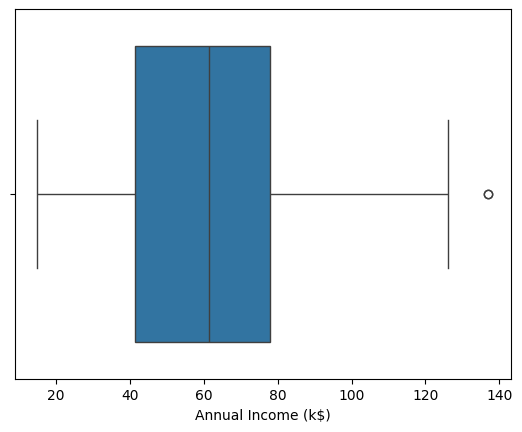

In [15]:
sns.boxplot(x = 'Annual Income (k$)', data = df)
plt.show()

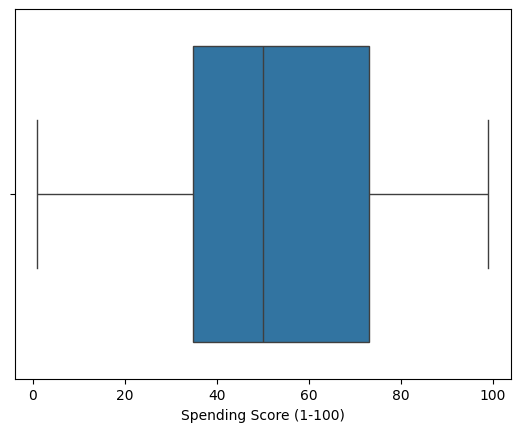

In [16]:
sns.boxplot(x = 'Spending Score (1-100)', data = df)
plt.show()

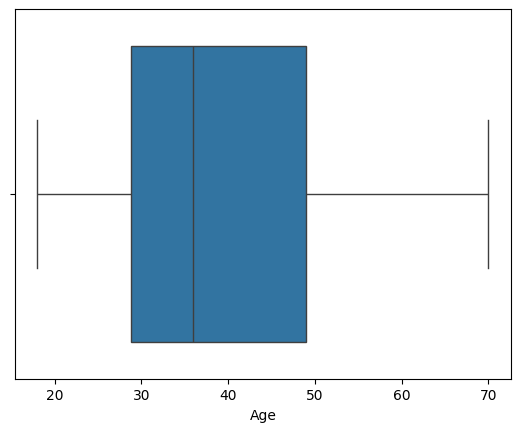

In [17]:
sns.boxplot(x = 'Age', data = df)
plt.show()

Remove the outliers.


We can transform the data so the effect of the outlier is neutralized.


1.   Square root Transformation
2.   Box Cox Transformation
3.   Log Transformation




In [19]:
#square root transformation
df['Annual Income sqrt'] = np.sqrt(df['Annual Income (k$)'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income sqrt
0,1,1,19,15,39,3.872983
1,2,1,21,15,81,3.872983
2,3,0,20,16,6,4.000000
3,4,0,23,16,77,4.000000
4,5,0,31,17,40,4.123106


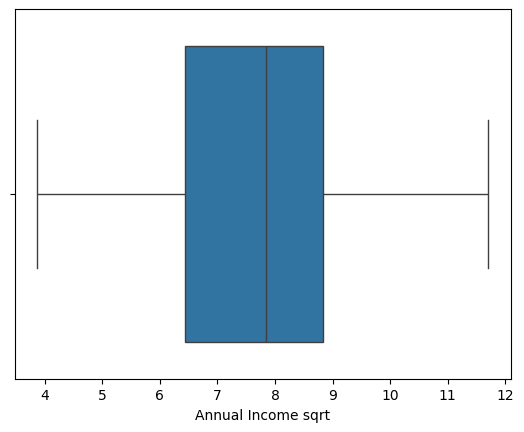

In [20]:
sns.boxplot(x = 'Annual Income sqrt', data = df)
plt.show()

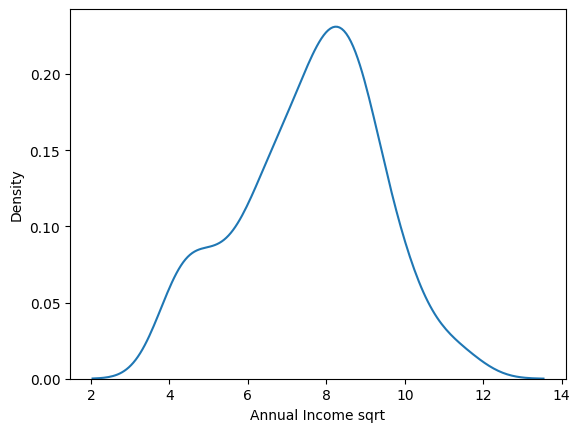

In [21]:
sns.kdeplot(x = 'Annual Income sqrt', data = df)
plt.show()

In [22]:
df.drop(columns = 'Annual Income sqrt', inplace = True)

Machine Learning ***Process***

In [23]:
X=df.values

**Make the dendrogram using the linkage process**

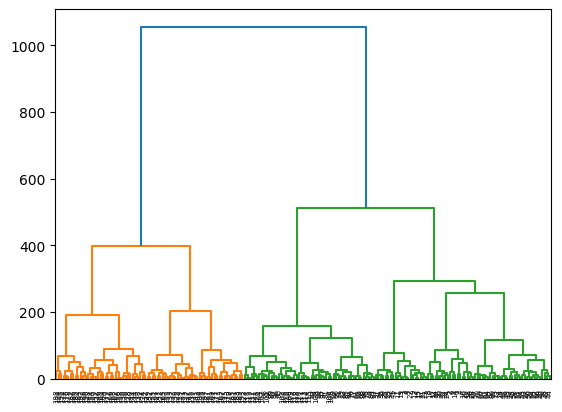

In [24]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

** Agglomerative Clustering on the data**

In [25]:
agg_cluster = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', metric = 'euclidean')
y = agg_cluster.fit_predict(X)

In [26]:
pd.DataFrame(y, columns = ['Cluster Number'])

,Cluster Number
0,1
1,1
2,1
3,1
4,1
...,...
195,0
196,0
197,0
198,0


In [27]:
output = pd.DataFrame(y, columns = ['Cluster Number'])

In [30]:
final_df = pd.concat([df, output], axis = 1)
final_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,0
197,198,1,32,126,74,0
198,199,1,32,137,18,0
